In [2]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
train_df = pd.read_csv("Dataset/train.csv", sep=" ", engine='python')
test_df = pd.read_csv("Dataset/test.csv", sep=" ", engine='python')

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
print("Train columns:", train_df.columns.tolist())

Train shape: (55307, 9)
Test shape: (23743, 8)
Train columns: ['Is Laundering', 'From Account', 'To Account', 'Payment Type', 'Amount Paid', 'Type Account From', 'Type Account To', 'Avg Stock Account From', 'Avg Stock Account To']


In [4]:
train_df.head()

,Is Laundering,From Account,To Account,Payment Type,Amount Paid,Type Account From,Type Account To,Avg Stock Account From,Avg Stock Account To
0,1,U0551,U2203,Cheque,186509.2850,B,B,308533361.0470,1144577.8970
1,0,U4572,U9001,ACH,439.9950,D,B,37526.1410,2084650.4250
2,1,U0551,U2203,Cheque,186711.1870,E,B,308532855.9550,1144922.0150
3,0,U1223,U7781,ACH,958.8240,A,D,86750.1500,3313102.0130
4,1,U0551,U2203,Cash,188971.3120,B,B,308532096.6880,1143957.2370


In [5]:
# Check for missing values
print("\nMissing values:\n", train_df.isnull().sum())

# Look at class distribution
print("\nClass distribution:\n", train_df['Is Laundering'].value_counts())
print("\nClass distribution (%):\n", train_df['Is Laundering'].value_counts(normalize=True) * 100)



Missing values:
 Is Laundering             0
From Account              0
To Account                0
Payment Type              0
Amount Paid               0
Type Account From         0
Type Account To           0
Avg Stock Account From    0
Avg Stock Account To      0
dtype: int64

Class distribution:
 Is Laundering
0    54621
1      686
Name: count, dtype: int64

Class distribution (%):
 Is Laundering
0   98.7597
1    1.2403
Name: proportion, dtype: float64


In [6]:
# Info about types
print(train_df.info())

# Describe numeric columns
print(train_df.describe())

# Check for unique values in categorical columns
categorical_columns = train_df.select_dtypes(include='object').columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55307 entries, 0 to 55306
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Is Laundering           55307 non-null  int64  
 1   From Account            55307 non-null  object 
 2   To Account              55307 non-null  object 
 3   Payment Type            55307 non-null  object 
 4   Amount Paid             55307 non-null  float64
 5   Type Account From       55307 non-null  object 
 6   Type Account To         55307 non-null  object 
 7   Avg Stock Account From  55307 non-null  float64
 8   Avg Stock Account To    55307 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 3.8+ MB
None
       Is Laundering        Amount Paid  Avg Stock Account From  \
count     55307.0000         55307.0000              55307.0000   
mean          0.0124     101010619.3253          707140826.2134   
std           0.1107   13873410362.5379  

In [7]:
categorical_columns = train_df.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"\n{col} unique values:", train_df[col].nunique())
    print(train_df[col].value_counts().head())



From Account unique values: 16998
From Account
U00629    1087
U00560     923
U00464     738
U04494      30
U00616      29
Name: count, dtype: int64

To Account unique values: 14042
To Account
U00560    65
U11636    63
U05954    59
U05060    56
U00629    55
Name: count, dtype: int64

Payment Type unique values: 5
Payment Type
Cheque         31344
ACH            11102
Credit Card    10995
Cash            1234
Wire             632
Name: count, dtype: int64

Type Account From unique values: 6
Type Account From
B    16509
A    11320
E    10994
C     5659
F     5504
Name: count, dtype: int64

Type Account To unique values: 6
Type Account To
B    15853
E    11251
A    10505
D     6550
C     5947
Name: count, dtype: int64


| Column                   | Meaning                                      | Type        | Notes                          |
| ------------------------ | -------------------------------------------- | ----------- | ------------------------------ |
| `Is Laundering`          | Target variable (0 = normal, 1 = laundering) | Binary      | ✅ Target                       |
| `From Account`           | ID of sender account                         | Categorical | Possibly useful for graph      |
| `To Account`             | ID of receiver account                       | Categorical | Possibly useful for graph      |
| `Payment Type`           | Method of payment (e.g., Cheque, Transfer)   | Categorical | Can one-hot or label encode    |
| `Amount Paid`            | Value of the transaction                     | Numeric     | ⚠️ Skewed — inspect with `log` |
| `Type Account From`      | Type of source account (e.g., A, B, C...)    | Categorical | Domain-driven encoding?        |
| `Type Account To`        | Type of destination account                  | Categorical | Same as above                  |
| `Avg Stock Account From` | Avg balance of sender account                | Numeric     | Normalize/scale                |
| `Avg Stock Account To`   | Avg balance of receiver account              | Numeric     | Normalize/scale                |


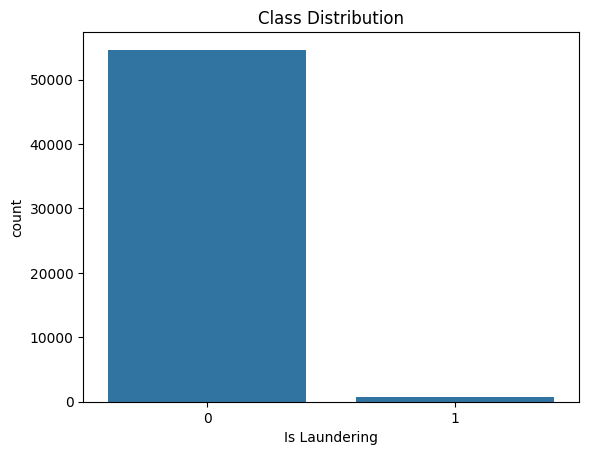

Is Laundering
0    54621
1      686
Name: count, dtype: int64
Is Laundering
0   98.7597
1    1.2403
Name: proportion, dtype: float64


In [9]:
# Countplot for target
sns.countplot(x='Is Laundering', data=train_df)
plt.title("Class Distribution")
plt.show()

# Print actual numbers and percentages
print(train_df['Is Laundering'].value_counts())
print(train_df['Is Laundering'].value_counts(normalize=True) * 100)


# Type Account

In [10]:
# Check value counts
print(train_df['Type Account From'].value_counts())
print(train_df['Type Account To'].value_counts())


Type Account From
B    16509
A    11320
E    10994
C     5659
F     5504
D     5321
Name: count, dtype: int64
Type Account To
B    15853
E    11251
A    10505
D     6550
C     5947
F     5201
Name: count, dtype: int64


### Type Account

No info regarding the labeling of the variable, so we are gonna consider name them later after the analysis depending by how they influence the target variable

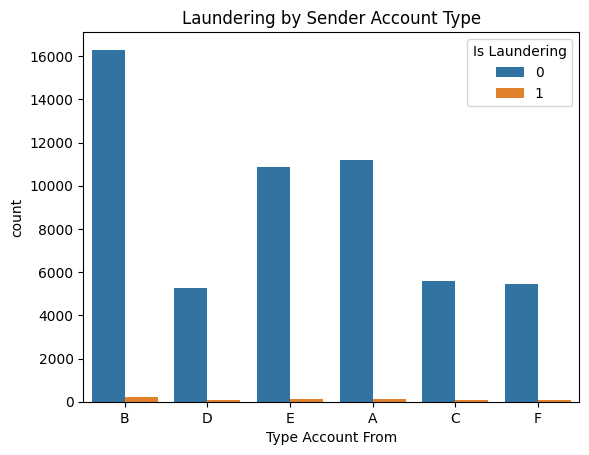

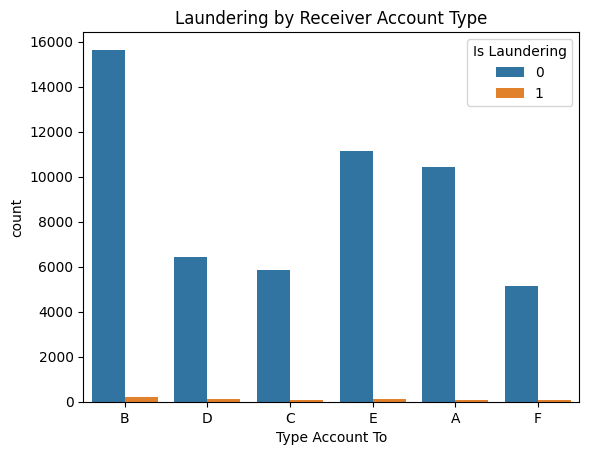

In [11]:
# Plot for sender type
sns.countplot(data=train_df, x='Type Account From', hue='Is Laundering')
plt.title("Laundering by Sender Account Type")
plt.show()

# Plot for receiver type
sns.countplot(data=train_df, x='Type Account To', hue='Is Laundering')
plt.title("Laundering by Receiver Account Type")
plt.show()


Amount type differ a lot so we have to take this into account

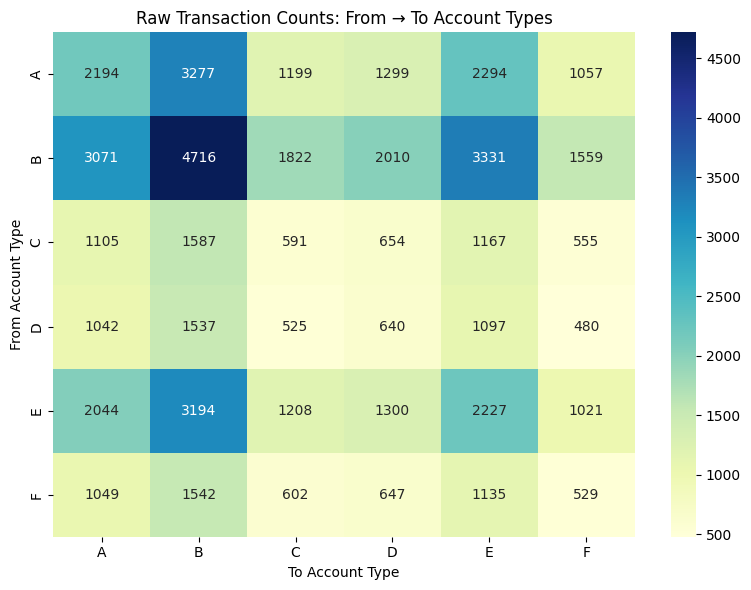

In [12]:
# Raw counts of From → To account type transitions
from_to_counts = pd.crosstab(
    train_df['Type Account From'],
    train_df['Type Account To']
)

# Plot raw counts
plt.figure(figsize=(8, 6))
sns.heatmap(from_to_counts, annot=True, fmt="d", cmap="YlGnBu")

plt.title('Raw Transaction Counts: From → To Account Types')
plt.xlabel('To Account Type')
plt.ylabel('From Account Type')
plt.tight_layout()
plt.show()



Using a heatmap make it easier to visualize

In [13]:
# Crosstab: Multi-index table for From → To vs. Is Laundering
pair_counts = pd.crosstab(
    [train_df['Type Account From'], train_df['Type Account To']],
    train_df['Is Laundering']
)

# Rename columns for clarity
pair_counts.columns = ['Count_0', 'Count_1']
pair_counts = pair_counts.reset_index()

# Create a pivot table for each label
count_0_matrix = pair_counts.pivot(index='Type Account From', columns='Type Account To', values='Count_0').fillna(0)
count_1_matrix = pair_counts.pivot(index='Type Account From', columns='Type Account To', values='Count_1').fillna(0)

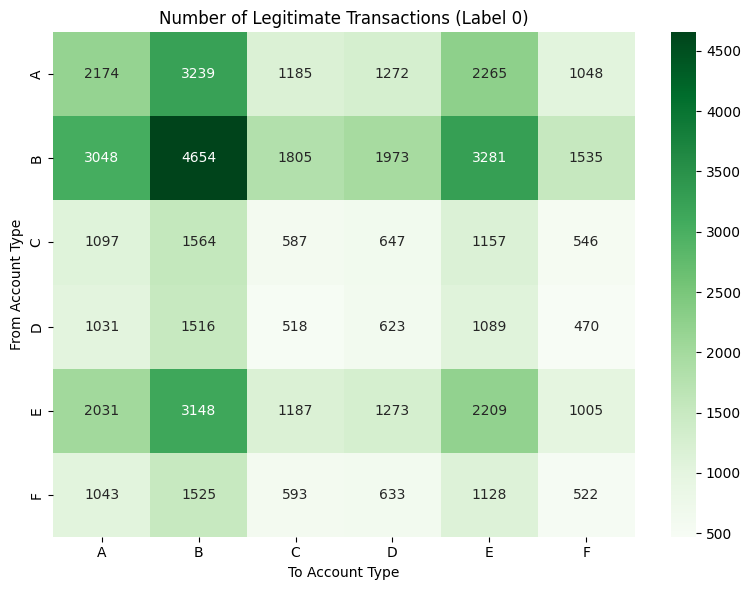

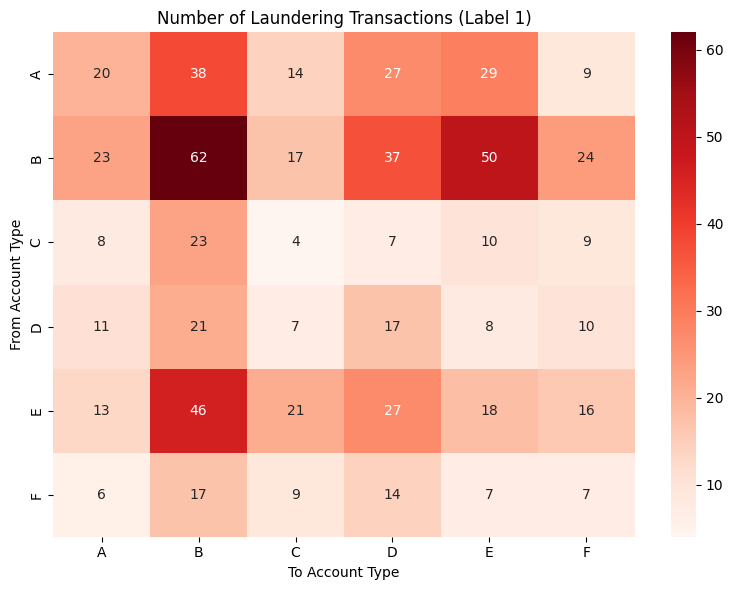

In [14]:
# Heatmap for label 0
plt.figure(figsize=(8, 6))
sns.heatmap(count_0_matrix, annot=True, fmt="d", cmap="Greens")
plt.title("Number of Legitimate Transactions (Label 0)")
plt.xlabel("To Account Type")
plt.ylabel("From Account Type")
plt.tight_layout()
plt.show()

# Heatmap for label 1
plt.figure(figsize=(8, 6))
sns.heatmap(count_1_matrix, annot=True, fmt="d", cmap="Reds")
plt.title("Number of Laundering Transactions (Label 1)")
plt.xlabel("To Account Type")
plt.ylabel("From Account Type")
plt.tight_layout()
plt.show()


Actually raw counts are not really informative cause they depends by the total amount of transictions done
A rate stats may be more informative

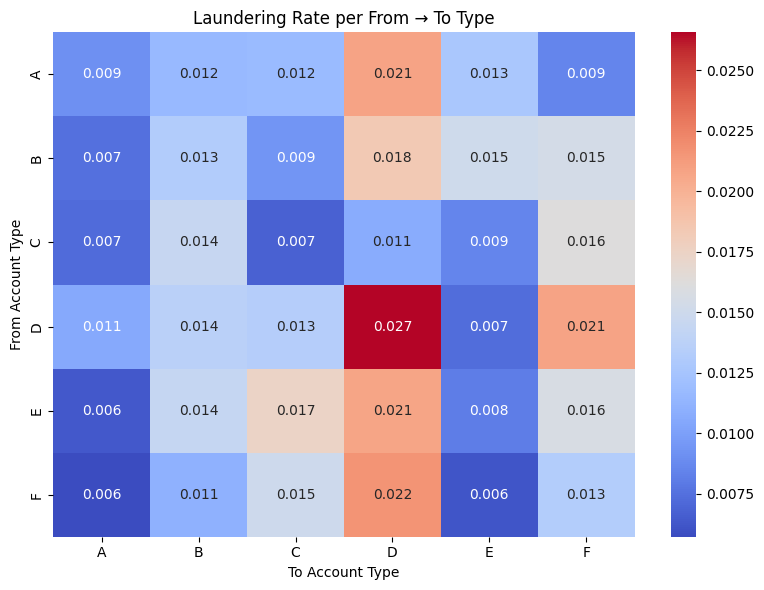

In [15]:
# Rate = laundering / total
laundering_rate = count_1_matrix / (count_0_matrix + count_1_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(laundering_rate, annot=True, fmt=".3f", cmap="coolwarm")
plt.title("Laundering Rate per From → To Type")
plt.xlabel("To Account Type")
plt.ylabel("From Account Type")
plt.tight_layout()
plt.show()


In [16]:
row_risk = laundering_rate.sum(axis=1).sort_values(ascending=False)
print("Sender Type Total Laundering Risk:\n", row_risk)

# Sum of laundering rates across each column (to receiver type)
col_risk = laundering_rate.sum(axis=0).sort_values(ascending=False)
print("\nReceiver Type Total Laundering Risk:\n", col_risk)


Sender Type Total Laundering Risk:
 Type Account From
D   0.0922
E   0.0827
B   0.0788
A   0.0743
F   0.0727
C   0.0640
dtype: float64

Receiver Type Total Laundering Risk:
 Type Account To
D   0.1189
F   0.0899
B   0.0783
C   0.0734
E   0.0578
A   0.0465
dtype: float64


This is the most informative graph for this variable, it shows how transictions TO a D type account are the one to take more into consideration, while instead the one FROM a C type account might be less significative

In [17]:
# Filter same-type transfers
same_type = train_df[train_df['Type Account From'] == train_df['Type Account To']]

# Laundering rate in same-type transfers
print("Same-type laundering rate:", same_type['Is Laundering'].mean())

# Compare to global laundering rate
print("Global laundering rate:", train_df['Is Laundering'].mean())


Same-type laundering rate: 0.011746352207029458
Global laundering rate: 0.012403493228705226


No reason to focus on same type transfer specifically, as we can see their differences with the rest is not significative

### Payment Type

In [18]:
# Count and percentage
print("Frequency:\n", train_df['Payment Type'].value_counts())
print("\nPercentage:\n", train_df['Payment Type'].value_counts(normalize=True) * 100)


Frequency:
 Payment Type
Cheque         31344
ACH            11102
Credit Card    10995
Cash            1234
Wire             632
Name: count, dtype: int64

Percentage:
 Payment Type
Cheque        56.6728
ACH           20.0734
Credit Card   19.8799
Cash           2.2312
Wire           1.1427
Name: proportion, dtype: float64


In [19]:
# Absolute count
pd.crosstab(train_df['Payment Type'], train_df['Is Laundering'], normalize='index')

Is Laundering,0,1
Payment Type,,
ACH,0.9634,0.0366
Cash,0.9862,0.0138
Cheque,0.9942,0.0058
Credit Card,0.9933,0.0067
Wire,0.9873,0.0127


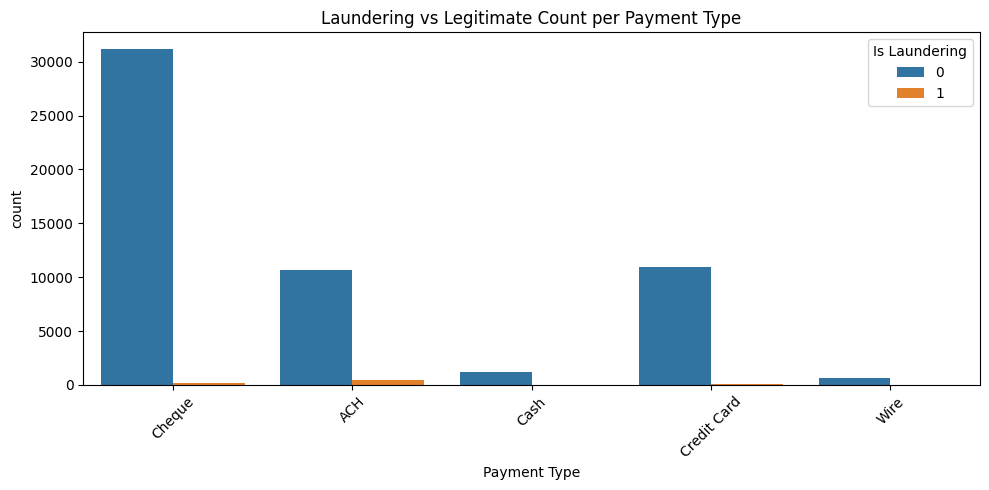

In [20]:
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df, x='Payment Type', hue='Is Laundering')
plt.title("Laundering vs Legitimate Count per Payment Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


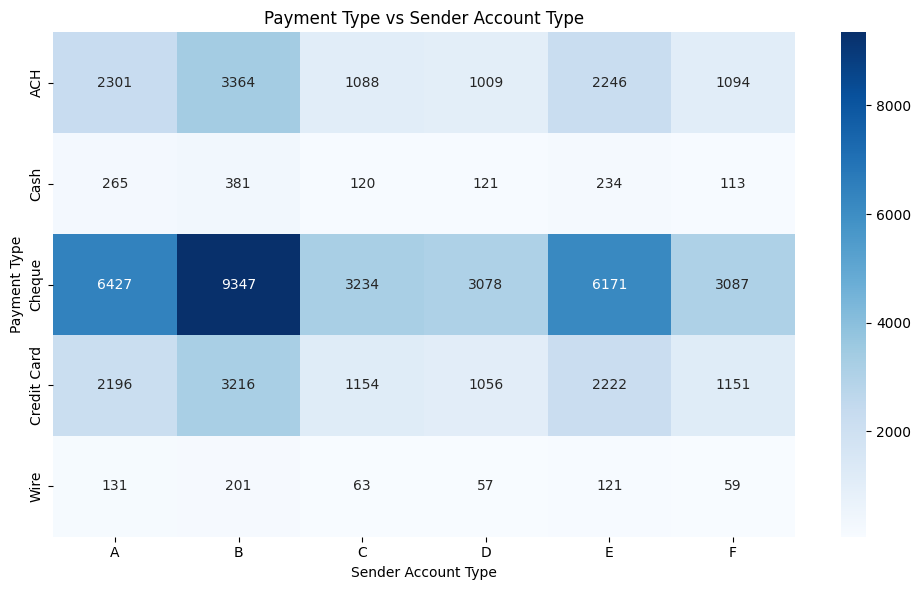

In [21]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(train_df['Payment Type'], train_df['Type Account From']), annot=True, fmt='d', cmap='Blues')
plt.title("Payment Type vs Sender Account Type")
plt.xlabel("Sender Account Type")   
plt.ylabel("Payment Type")
plt.tight_layout()
plt.show()

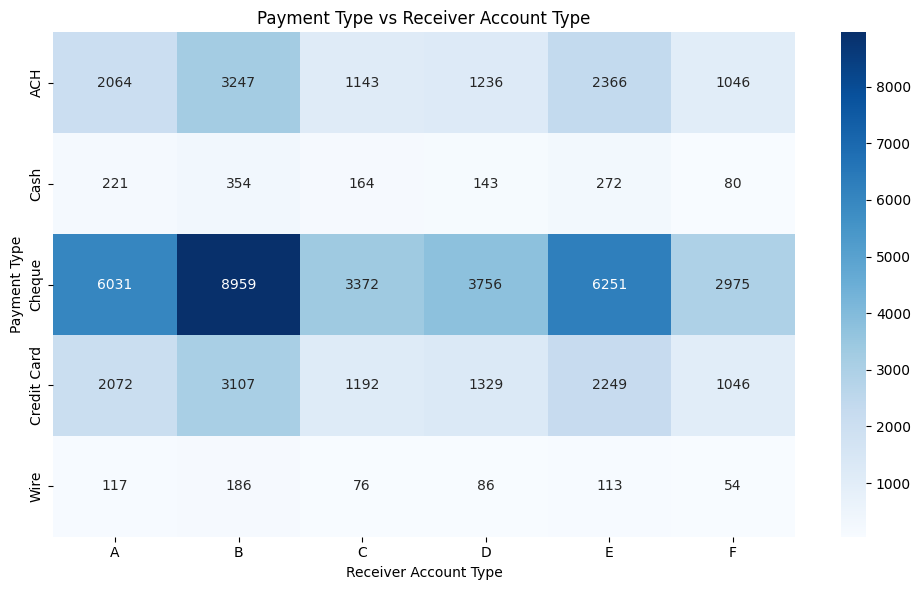

In [22]:
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(train_df['Payment Type'], train_df['Type Account To']), annot=True, fmt='d', cmap='Blues')  
plt.title("Payment Type vs Receiver Account Type")
plt.xlabel("Receiver Account Type")
plt.ylabel("Payment Type")
plt.tight_layout()
plt.show()

### ID

In [23]:
# Filter only transactions where sender == receiver
same_account_df = train_df[train_df['From Account'] == train_df['To Account']]

# Count how many such transactions exist
count_same = same_account_df.shape[0]
total = train_df.shape[0]

print(f"Same-account transactions: {count_same} out of {total} ({(count_same / total) * 100:.4f}%)")

# Laundering stats among them
laundering_same_count = same_account_df['Is Laundering'].sum()
laundering_same_rate = laundering_same_count / count_same if count_same > 0 else 0

print(f"Laundering in same-account: {laundering_same_count} cases")
print(f"Laundering rate among them: {laundering_same_rate:.4f} ({laundering_same_rate*100:.2f}%)")

Same-account transactions: 78 out of 55307 (0.1410%)
Laundering in same-account: 0 cases
Laundering rate among them: 0.0000 (0.00%)


This could lead to a initial rule based approach, this info might be really interesting

In [24]:
# Group by From Account and count unique types
from_type_variability = train_df.groupby('From Account')['Type Account From'].nunique()

# How many From Accounts have >1 type?
multi_type_from_count = (from_type_variability > 1).sum()
total_from_accounts = from_type_variability.shape[0]

print(f"From Accounts with multiple types: {multi_type_from_count} / {total_from_accounts} ({(multi_type_from_count/total_from_accounts)*100:.2f}%)")


From Accounts with multiple types: 9831 / 16998 (57.84%)


In [25]:
# From Account type mapping
from_types = train_df.groupby('From Account')['Type Account From'].unique()

# To Account type mapping
to_types = train_df.groupby('To Account')['Type Account To'].unique()

# Combine into one mapping
combined_types = pd.concat([from_types, to_types], axis=1, keys=["From_Types", "To_Types"]).fillna("[]")

# Flatten and unify type sets
def merge_sets(row):
    types = set(row['From_Types']).union(set(row['To_Types']))
    return list(types)

combined_types['All_Types'] = combined_types.apply(merge_sets, axis=1)
combined_types['Num_Unique_Types'] = combined_types['All_Types'].apply(len)

# Summary
multi_type_accounts = combined_types[combined_types['Num_Unique_Types'] > 1]
print(f"Accounts used with >1 type: {len(multi_type_accounts)}")
print(f"Total unique accounts: {len(combined_types)}")
print(f"Percentage: {len(multi_type_accounts)/len(combined_types)*100:.2f}%")


Accounts used with >1 type: 15087
Total unique accounts: 18844
Percentage: 80.06%


In [26]:
# Flag accounts with multiple types
multi_type_ids = set(multi_type_accounts.index)

# Flag all rows where From OR To is a multi-type account
train_df['Is Multi-Type Account'] = train_df.apply(
    lambda row: row['From Account'] in multi_type_ids or row['To Account'] in multi_type_ids,
    axis=1
)

# Laundering rate
laundering_rate_by_multi_type = train_df.groupby('Is Multi-Type Account')['Is Laundering'].mean()
print("Laundering rate:\n", laundering_rate_by_multi_type)


Laundering rate:
 Is Multi-Type Account
False   0.0053
True    0.0126
Name: Is Laundering, dtype: float64


In [27]:
# Count laundering cases by whether it's a multi-type account or not
laundering_cases = train_df[train_df['Is Laundering'] == 1]
laundering_by_group = laundering_cases['Is Multi-Type Account'].value_counts()

# Normalize to percentage
laundering_by_group_percent = laundering_by_group / laundering_by_group.sum() * 100

# Format
print("Proportion of laundering cases:")
print(laundering_by_group_percent.rename({
    True: "Multi-Type Account involved",
    False: "Single-Type Account only"
}))


Proportion of laundering cases:
Is Multi-Type Account
Multi-Type Account involved   99.1254
Single-Type Account only       0.8746
Name: count, dtype: float64


In [28]:
# Group transactions by multi-type status
grouped = train_df.groupby('Is Multi-Type Account')['Is Laundering'].value_counts().unstack(fill_value=0)

# Rename for clarity
grouped.columns = ['Legit', 'Laundering']
grouped['Total'] = grouped['Legit'] + grouped['Laundering']
grouped['Fraud Rate'] = grouped['Laundering'] / grouped['Total']

# Rename index for clarity
grouped.index = grouped.index.map({True: 'Multi-Type Account', False: 'Single-Type Account'})

# Display
print(grouped)

                       Legit  Laundering  Total  Fraud Rate
Is Multi-Type Account                                      
Single-Type Account     1123           6   1129      0.0053
Multi-Type Account     53498         680  54178      0.0126


We have more than double fraud transaction that comes from multi-account, this might be interesting connection

In [29]:
# Reuse the earlier merged account dataset
# All From + To accounts with types and laundering label

from_df = train_df[['From Account', 'Type Account From', 'Is Laundering']].rename(columns={
    'From Account': 'Account',
    'Type Account From': 'Type'
})
to_df = train_df[['To Account', 'Type Account To', 'Is Laundering']].rename(columns={
    'To Account': 'Account',
    'Type Account To': 'Type'
})
all_accounts = pd.concat([from_df, to_df], ignore_index=True)

# Group by account: count number of unique types and laundering status
account_laundering_stats = all_accounts.groupby('Account').agg(
    Num_Types=('Type', pd.Series.nunique),
    Ever_Laundered=('Is Laundering', 'max')  # 1 if ever laundered
).reset_index()

# Now group by number of types
grouped_by_types = account_laundering_stats.groupby('Num_Types').agg(
    Total_Accounts=('Account', 'count'),
    Laundering_Accounts=('Ever_Laundered', 'sum')
)

grouped_by_types['Laundering Rate (%)'] = (
    grouped_by_types['Laundering_Accounts'] / grouped_by_types['Total_Accounts'] * 100
).round(2)

print(grouped_by_types)

           Total_Accounts  Laundering_Accounts  Laundering Rate (%)
Num_Types                                                          
1                    9013                   84               0.9300
2                    4512                   46               1.0200
3                    2517                   43               1.7100
4                    1573                   49               3.1200
5                     891                   34               3.8200
6                     338                   15               4.4400


even more clear here, this is a good hint for a good Data Eng, we might build a new variable later

In [30]:
# ---------------------
# SENDER STATS (From Account)
# ---------------------
from_stats = train_df.groupby('From Account').agg(
    Total_To_Accounts=('To Account', pd.Series.nunique),
    Total_Transactions=('To Account', 'count'),
    Laundering_Transactions=('Is Laundering', 'sum')
)

from_stats['Fraud %'] = (from_stats['Laundering_Transactions'] / from_stats['Total_Transactions']) * 100
from_stats = from_stats.reset_index().rename(columns={'From Account': 'Account'})


# ---------------------
# RECEIVER STATS (To Account)
# ---------------------
to_stats = train_df.groupby('To Account').agg(
    Total_From_Accounts=('From Account', pd.Series.nunique),
    Total_Transactions=('From Account', 'count'),
    Laundering_Transactions=('Is Laundering', 'sum')
)

to_stats['Fraud %'] = (to_stats['Laundering_Transactions'] / to_stats['Total_Transactions']) * 100
to_stats = to_stats.reset_index().rename(columns={'To Account': 'Account'})


In [32]:
to_stats

,Account,Total_From_Accounts,Total_Transactions,Laundering_Transactions,Fraud %
0,U00001,4,4,0,0.0000
1,U00002,5,5,0,0.0000
2,U00003,6,6,0,0.0000
3,U00004,6,6,0,0.0000
4,U00005,7,7,0,0.0000
...,...,...,...,...,...
14037,U9001,1,1,0,0.0000
14038,U9236,1,1,0,0.0000
14039,U9271,1,1,0,0.0000
14040,U9273,1,1,0,0.0000


In [33]:
from_stats

,Account,Total_To_Accounts,Total_Transactions,Laundering_Transactions,Fraud %
0,U00001,25,25,0,0.0000
1,U00002,13,13,0,0.0000
2,U00003,9,9,0,0.0000
3,U00004,5,5,0,0.0000
4,U00005,7,7,0,0.0000
...,...,...,...,...,...
16993,U8336,1,6,6,100.0000
16994,U8385,1,4,4,100.0000
16995,U9201,1,1,0,0.0000
16996,U9257,1,5,5,100.0000


In [ ]:
# 1. Get number of unique To Accounts for each From Account
from_unique_to = train_df.groupby('From Account')['To Account'].nunique()
from_one_to = from_unique_to[from_unique_to == 1].index

# 2. Get number of unique From Accounts for each To Account
to_unique_from = train_df.groupby('To Account')['From Account'].nunique()
to_one_from = to_unique_from[to_unique_from == 1].index


# 1. Filter transactions with From Account in the "1-to" group
from_one_txns = train_df[train_df['From Account'].isin(from_one_to)]

# 2. Filter transactions with To Account in the "1-from" group
to_one_txns = train_df[train_df['To Account'].isin(to_one_from)]

# 3. Intersecting accounts (same IDs that appear in both roles)
intersection_accounts = set(from_one_to).intersection(set(to_one_from))
intersect_txns = train_df[
    train_df['From Account'].isin(intersection_accounts) | train_df['To Account'].isin(intersection_accounts)
]

# Laundering rates
from_one_rate = from_one_txns['Is Laundering'].mean()
to_one_rate = to_one_txns['Is Laundering'].mean()
intersect_rate = intersect_txns['Is Laundering'].mean()

# Counts
print(f"From-1-only Accounts: {len(from_one_to)} — Laundering Rate: {from_one_rate*100:.2f}%")
print(f"To-1-only Accounts:   {len(to_one_from)} — Laundering Rate: {to_one_rate*100:.2f}%")
print(f"Intersecting Accounts: {len(intersection_accounts)} — Laundering Rate: {intersect_rate*100:.2f}%")

🔹 From-1-only Accounts: 6347 — Laundering Rate: 3.35%
🔸 To-1-only Accounts:   2264 — Laundering Rate: 6.90%
🔁 Intersecting Accounts: 651 — Laundering Rate: 0.77%


Also the unique number of transaction to a same account might be an interesting variable